## Reshaping Layout of Tables

<img src="images/02_long_wide_format.PNG" />

**Question: How to reshape the layout of tables?**  
**Answer:** Change the structure of your data table in multiple ways. You can `melt()` your data table from `wide to long/tidy form` or `pivot()` from `long to wide format`. With aggregations built-in, a pivot table is created with a single command.

<img style="float: right;" width="400" height="400" src="images/03_pivot.PNG">

### Analyse and Summarize Data using pivot_table()
Data is often stored in so-called `stacked` or `record` format. In a `record` or `wide` format, typically there is one row for each subject. In the `stacked` or `long` format there are multiple rows for each subject where applicable.

<img src="images/04_melt.PNG" />

## Merging

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Syntax
# pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None)
# how : {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’

In [3]:
cust_df = pd.read_csv('data/customer_data.csv')

prod_df = pd.read_csv('data/product_data.csv')

pur_df = pd.read_csv('data/purchase_data.csv')

In [4]:
pur_df.head()

,cust_id,prod_id
0,cust_12345,p_001
1,cust_12346,p_003
2,cust_12347,p_002
3,cust_12348,p_004
4,cust_12349,p_001


In [5]:
cust_df.head()

,cust_id,cust_name
0,cust_12345,Sally
1,cust_12346,Jenna
2,cust_12347,Eliana
3,cust_12348,Cristen
4,cust_12349,Steve


In [6]:
prod_df.head()

,prod_id,prod_name
0,p_001,Machine Learning
1,p_002,Data Structures
2,p_003,Full Stack Development
3,p_004,Competitive Programming


In [7]:
df = pd.merge(pur_df, cust_df, how='inner', on='cust_id')
df.head()

,cust_id,prod_id,cust_name
0,cust_12345,p_001,Sally
1,cust_12346,p_003,Jenna
2,cust_12347,p_002,Eliana
3,cust_12348,p_004,Cristen
4,cust_12349,p_001,Steve


In [8]:
df = pd.merge(df, prod_df, how='inner', on='prod_id')
df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning


In [9]:
df.prod_name.value_counts()

Machine Learning           9
Data Structures            9
Competitive Programming    6
Full Stack Development     5
Name: prod_name, dtype: int64

In [10]:
new_df = df.groupby('prod_name')

new_df

In [11]:
new_df.head()

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning
9,cust_12346,p_003,Jenna,Full Stack Development
10,cust_12353,p_003,Pansy,Full Stack Development
11,cust_12359,p_003,Latrisha,Full Stack Development
12,cust_12363,p_003,Shela,Full Stack Development
13,cust_12370,p_003,Angla,Full Stack Development


In [12]:
new_df.first()

,cust_id,prod_id,cust_name
prod_name,,,
Competitive Programming,cust_12348,p_004,Cristen
Data Structures,cust_12347,p_002,Eliana
Full Stack Development,cust_12346,p_003,Jenna
Machine Learning,cust_12345,p_001,Sally


In [13]:
new_df.groups.keys()

dict_keys(['Competitive Programming', 'Data Structures', 'Full Stack Development', 'Machine Learning'])

In [14]:
new_df.get_group('Machine Learning')

,cust_id,prod_id,cust_name,prod_name
0,cust_12345,p_001,Sally,Machine Learning
1,cust_12349,p_001,Steve,Machine Learning
2,cust_12350,p_001,Kelli,Machine Learning
3,cust_12352,p_001,Aretha,Machine Learning
4,cust_12355,p_001,Carla,Machine Learning
5,cust_12357,p_001,Normand,Machine Learning
6,cust_12358,p_001,Nam,Machine Learning
7,cust_12367,p_001,Taunya,Machine Learning
8,cust_12369,p_001,Dung,Machine Learning


In [15]:
new_df.describe()

cust_id                         prod_id                \
                          count unique         top freq   count unique    top   
prod_name                                                                       
Competitive Programming       6      6  cust_12348    1       6      1  p_004   
Data Structures               9      9  cust_12347    1       9      1  p_002   
Full Stack Development        5      5  cust_12346    1       5      1  p_003   
Machine Learning              9      9  cust_12345    1       9      1  p_001   

                             cust_name                         
                        freq     count unique        top freq  
prod_name                                                      
Competitive Programming    6         6      6  Cristen      1  
Data Structures            9         9      9   Eliana      1  
Full Stack Development     5         5      5    Jenna      1  
Machine Learning           9         9      9    Sally      1

In [16]:
df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [19]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
setosa_df = df.loc[df.Species == 'Iris-setosa' , :]

In [21]:
setosa_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
setosa_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,25.50000,5.00600,3.418000,1.464000,0.24400
std,14.57738,0.35249,0.381024,0.173511,0.10721
min,1.00000,4.30000,2.300000,1.000000,0.10000
25%,13.25000,4.80000,3.125000,1.400000,0.20000
50%,25.50000,5.00000,3.400000,1.500000,0.20000
75%,37.75000,5.20000,3.675000,1.575000,0.30000
max,50.00000,5.80000,4.400000,1.900000,0.60000


In [23]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
versicolor_df = df.loc[df.Species == 'Iris-versicolor' , :]

In [25]:
versicolor_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.000000,50.000000
mean,75.50000,5.936000,2.770000,4.260000,1.326000
std,14.57738,0.516171,0.313798,0.469911,0.197753
min,51.00000,4.900000,2.000000,3.000000,1.000000
25%,63.25000,5.600000,2.525000,4.000000,1.200000
50%,75.50000,5.900000,2.800000,4.350000,1.300000
75%,87.75000,6.300000,3.000000,4.600000,1.500000
max,100.00000,7.000000,3.400000,5.100000,1.800000


In [26]:
virginica_df = df.loc[df.Species == 'Iris-virginica' , :]

In [27]:
virginica_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.00000,50.000000,50.000000,50.00000
mean,125.50000,6.58800,2.974000,5.552000,2.02600
std,14.57738,0.63588,0.322497,0.551895,0.27465
min,101.00000,4.90000,2.200000,4.500000,1.40000
25%,113.25000,6.22500,2.800000,5.100000,1.80000
50%,125.50000,6.50000,3.000000,5.550000,2.00000
75%,137.75000,6.90000,3.175000,5.875000,2.30000
max,150.00000,7.90000,3.800000,6.900000,2.50000


In [28]:
new_df = df.groupby('Species')

In [29]:
new_df['SepalLengthCm'].mean()

Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64

In [30]:
new_df.SepalLengthCm.describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


## Missing Values

http://analytics-magazine.org/missing-values/

<b>Major takeaway:</b>
1. Missing values in the data create uncertainty for the analyst and the information consumer because decisions need to be made without having the full picture.
2. Missing values can also reduce the number of usable records for the analysis, or force analysts to eliminate variables from the analysis.
3. Consequently, if an observation has a missing value in any of the required variables, the whole observation (data record) needs to be omitted from the analysis.
4. Other options would be to exclude it from the analysis variable as a whole or to insert imputation values for the missing data points.


## Plotting with Pandas

Syntax - Dataframe.plot(kind = "")

The kind of plot to produce:
1. `line` : line plot (default)
2. `bar` : vertical bar plot
3. `barh` : horizontal bar plot
4. `hist` : histogram
5. `box` : boxplot
6. `kde` : Kernel Density Estimation plot
7. `density` : same as ‘kde’
8. `area` : area plot
9. `pie` : pie plot
10. `scatter` : scatter plot
11. `hexbin` : hexbin plot

In [31]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<AxesSubplot:ylabel='Frequency'>

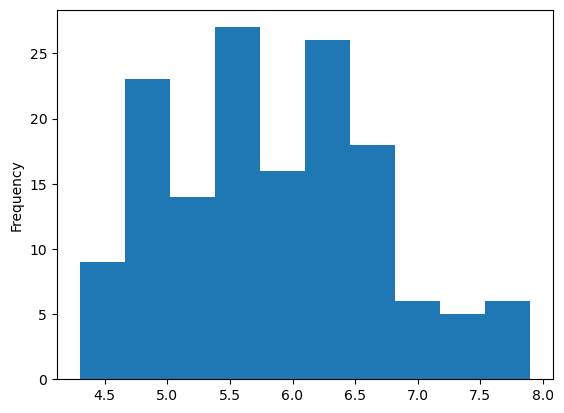

In [33]:
df['SepalLengthCm'].plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

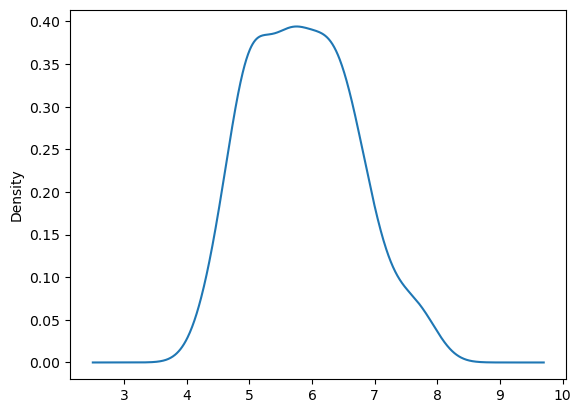

In [34]:
df['SepalLengthCm'].plot(kind = 'kde')

<AxesSubplot:>

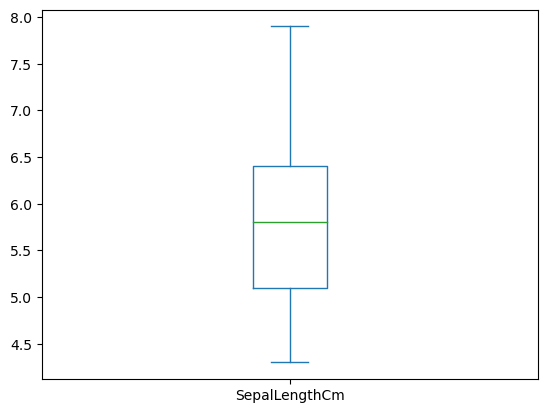

In [35]:
df['SepalLengthCm'].plot(kind = 'box')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

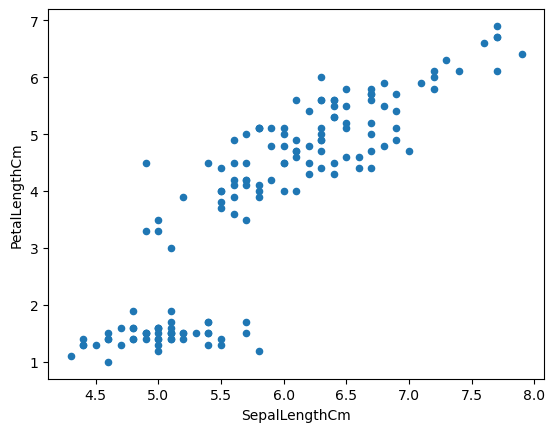

In [36]:
df.plot(x = "SepalLengthCm", y = "PetalLengthCm", kind = 'scatter')